# Iris Flower Classification

## Objective: 
To Predict which class an Iris Flower belongs based on its parameters like petal-length, petal-width, sepal-length, sepal-width

## Dataset used:
Iris dataset from UCI Machine Learning repository
can be downloaded from(https://goo.gl/mLmoIz)
Its also present in sklearn.datasets in the form of dictionary, can be loaded from there as well




### Step1: Loading necessary Libraries


In [1]:
# Step1: Loading necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Step2: Loading dataset

In [2]:
# Step2: Loading dataset
filename = "iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataset = pd.read_csv(filename, names=columns)


### Step3: Summarize the dataset

 Dimensions of the dataset.
 Peek at the data itself.
 Statistical summary of all attributes.
 Breakdown of the data by the class variable

In [3]:
#shape
dataset.shape

(150, 5)

In [21]:
# Peak at the data, Looking first 10 rows
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [23]:
# info about dataset attributes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
# Statistical Summary/description of attributes
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# Determining how many rows belongs to which class
dataset.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Step4: Data Visualization
* Univariate plots to better understand each attribute.
* Multivariate plots to better understand the relationships between attributes

   #### Univariate plots


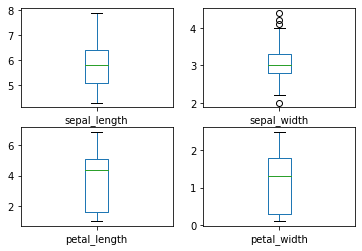

In [31]:
#box and whisker plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

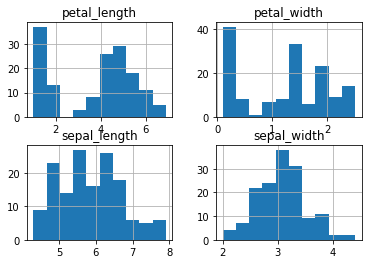

In [32]:
#histogram
dataset.hist()
plt.show()


#### Multivariate Plots


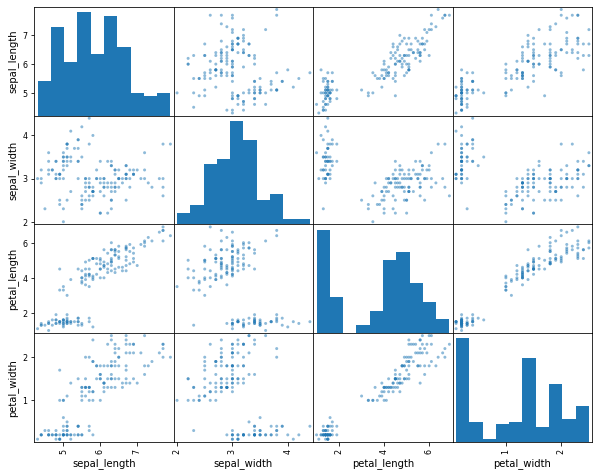

In [53]:
# Scatterplot matrix
pd.plotting.scatter_matrix(dataset, figsize=[10,8])
plt.show()


### Step5 : Split Data into training and testing dataset

In [4]:
# defining Input variable
input_variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = dataset[input_variables]

# Defining output variable
Y = dataset['class']

In [32]:
# split data into train and test data
from sklearn.model_selection import train_test_split
seed = 8
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.20, random_state= seed)


### Step6: Model Building

We dont know which Model would be good model for this Problem. So, lets evaluate six different algorithms
 Logistic Regression (LR).
 Linear Discriminant Analysis (LDA).
 k-Nearest Neighbors (KNN).
 Classification and Regression Trees (CART).
 Gaussian Naive Bayes (NB).
 Support Vector Machines (SVM).
This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms.


In [14]:
# importing necessary functions from Sklearn 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state= seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.100347)
LDA: 0.983333 (0.050000)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.038188)
SVM: 0.975000 (0.038188)


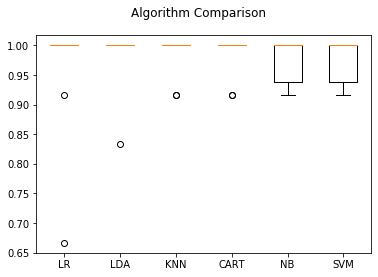

In [35]:
# Compare Algorithms by Ploting the distribution of scores for each algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see KNN and CART has highest accuracy, lets select KNN for as our model for predictions


### Step 7: Make Predictions

In [45]:
# Make predictions on Test dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, predictions))
print("\n Confusion Matrix:\n", confusion_matrix(Y_test, predictions))
print("\n Classification_report:\n", classification_report(Y_test, predictions))

Accuracy Score: 0.9

 Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]

 Classification_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



Confusion Matrix shows that there were 3 errors in our predictions and our predictions are **90% accurate**.